In [52]:
import os
import numpy as np
import SimpleITK as sitk
from rt_utils import RTStructBuilder
import pandas as pd
import matplotlib.pyplot as plt

#### Read predictions & write to RTStruct

In [59]:
preds = np.load('../all_levels_logs/predictions.npz')
slices, masks, ids = preds.values()
ids = [''.join(elem) for elem in ids]
slices.shape, masks.shape, len(ids)

((660, 3, 512, 512), (660, 1, 512, 512), 660)

In [60]:
df = pd.DataFrame(columns=['pid', 'idx'])
for i, name in enumerate(ids):
    pid, idx = name.split('_')
    df.loc[i] = [pid, int(idx)]
df.sort_values('idx', inplace=True)

In [63]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

20FRACpet259
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0

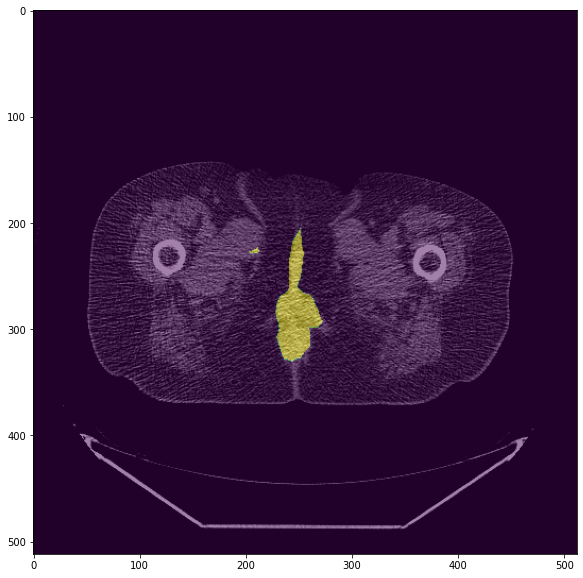

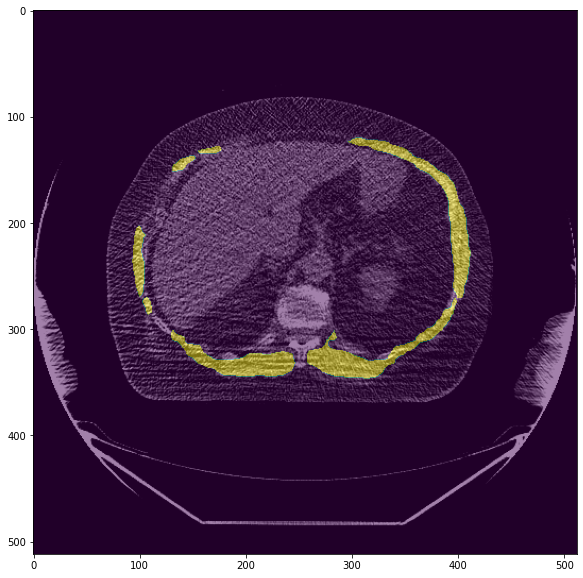

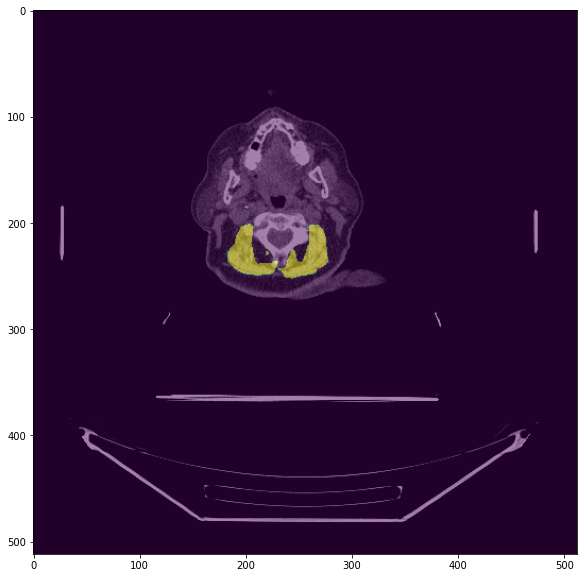

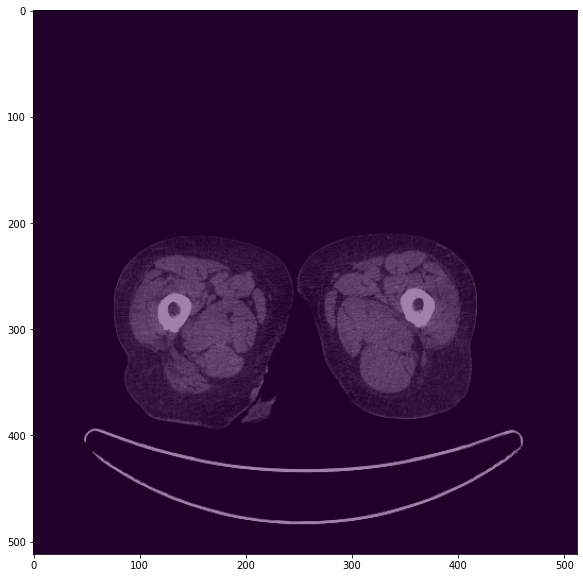

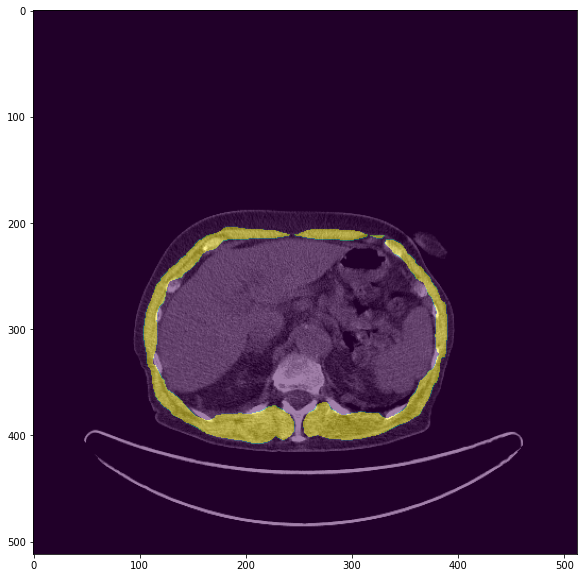

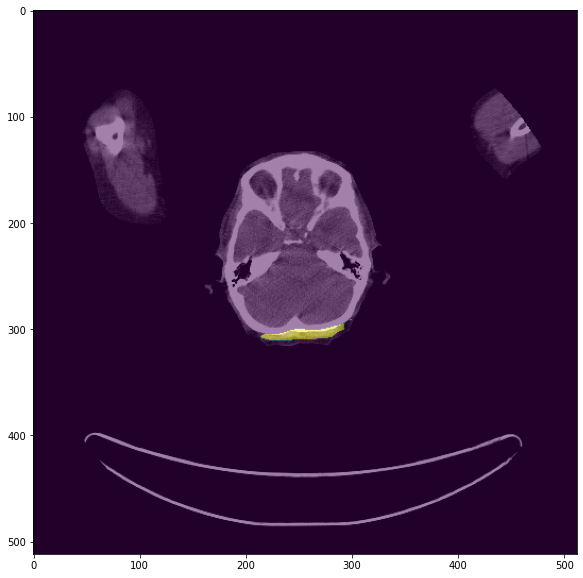

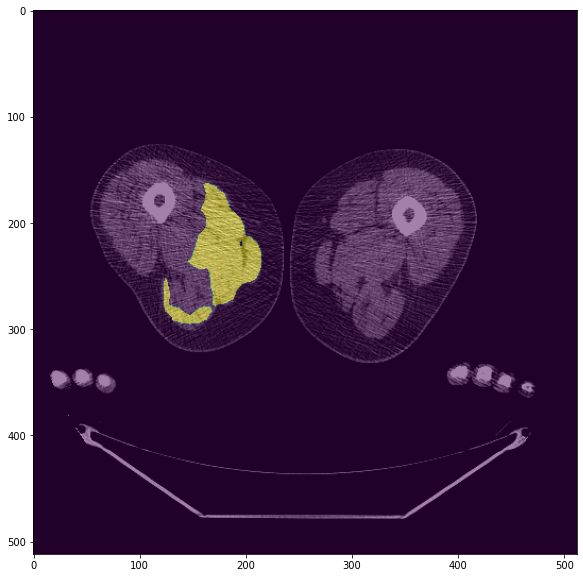

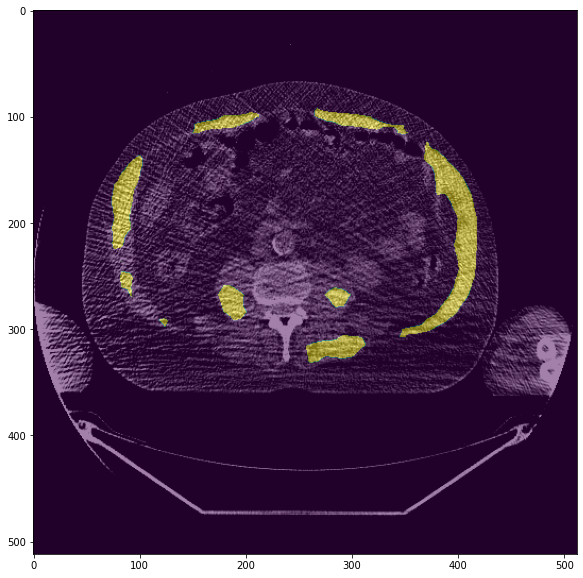

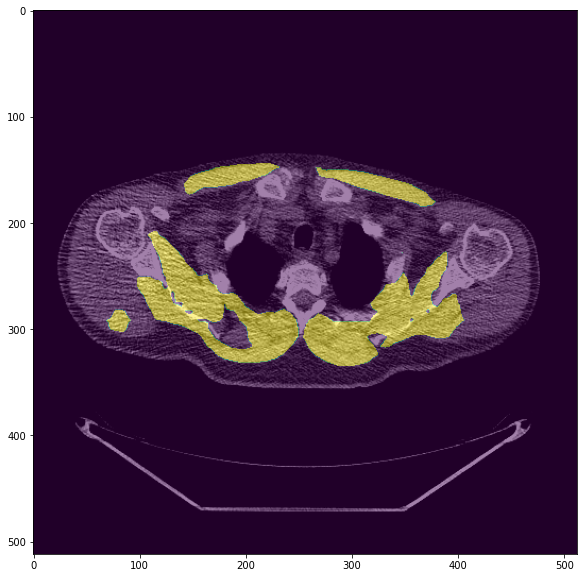

In [66]:
mask_holder = {}
for pid in pd.unique(df['pid']):
    print(pid)
    subset = df[df['pid'] == pid]

    pid_mask = []
    pid_slices = []
    for row in subset.iterrows():
        idx = row[-1]['idx']
        filename = f'{pid}_{idx}'
        index = ids.index(filename)
        s = slices[index, 0]
        m = np.round(sigmoid(masks[index, 0]))
        print(m.min(), m.max())
        pid_slices.append(s)
        pid_mask.append(m.astype(bool))

        if idx % 100 == 0:
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            ax.imshow(s, cmap='gray')
            ax.imshow(m.astype(bool), alpha=0.5)

    mask_holder[pid] = np.stack(pid_mask, axis=-1) 

In [67]:
input_path = '/data/sarcopenia/test_dicom/'
for pid, elem in mask_holder.items():
    print(pid, elem.shape)
    struct = RTStructBuilder.create_new(
        dicom_series_path=os.path.join(input_path, pid))
    struct.add_roi(
        mask=elem,
        color=[255, 0, 255],
        name="Skeletal_Muscle"
    )
    struct.save(f'/data/t/Donal/RTStructs/{pid}-struct')

20FRACpet259 (512, 512, 215)
Writing file to /data/t/Donal/RTStructs/20FRACpet259-struct.dcm
20FRACpet20 (512, 512, 206)
Writing file to /data/t/Donal/RTStructs/20FRACpet20-struct.dcm
20FRACpet954 (512, 512, 239)
Writing file to /data/t/Donal/RTStructs/20FRACpet954-struct.dcm
